<a href="https://colab.research.google.com/github/abxda/UAurora-ECD/blob/main/Semana_3_Aurora_ECD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio Práctico en Google Colab:  
Análisis Exploratorio de Datos Sintéticos con Python**

---

**Objetivo:**  
Aplicar técnicas de organización de datos, estadística descriptiva y visualización utilizando un dataset sintético en Google Colab. Al finalizar, podrás:
1. Cargar y explorar un dataset
2. Calcular medidas estadísticas clave
3. Generar visualizaciones interpretativas

---

**Paso 1: Configuración del Entorno**  
Crea un nuevo cuaderno en [Google Colab](https://colab.research.google.com/) y ejecuta:

In [ ]:
# Instalar librerías necesarias (si no están disponibles)
!pip install pandas numpy matplotlib seaborn --quiet

---

**Paso 2: Generación de Datos Sintéticos**  
Ejecuta este código para crear un dataset de clientes:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

data = {
    'Edad': np.random.normal(35, 5, 1000).astype(int),
    # Quitar conversión a int para Ingreso_Anual
    'Ingreso_Anual': np.random.lognormal(10.5, 0.4, 1000),
    'Genero': np.random.choice(['Hombre', 'Mujer', 'Otro'], 1000, p=[0.48, 0.48, 0.04]),
    'Puntuacion_Satisfaccion': np.random.randint(1, 11, 1000),
    'Monto_Compra': np.random.exponential(200, 1000)
}

# Introducir valores faltantes (ahora compatible con float)
data['Ingreso_Anual'][np.random.choice(1000, 20, replace=False)] = np.nan

# Introducir outliers y convertir a int
data['Monto_Compra'] = data['Monto_Compra'].astype(int)
data['Monto_Compra'][np.random.choice(1000, 15)] = 9999

# Crear DataFrame
df = pd.DataFrame(data)

# Convertir Ingreso_Anual a int (manejando NaNs)
df['Ingreso_Anual'] = df['Ingreso_Anual'].round().astype('Int64')  # Usar tipo nullable de pandas

df.to_csv('datos_sinteticos.csv', index=False)

**Explicación:**  
- Creamos 5 variables con diferentes distribuciones
- Incluimos valores faltantes en ingresos y outliers en compras
- Usamos funciones de NumPy para generar datos realistas



---

**Paso 3: Exploración Inicial de Datos**

In [ ]:
# Primer vistazo
print("Primeras 5 filas:")
display(df.head())

print("\nInformación del dataset:")
df.info()

print("\nEstadísticas descriptivas:")
display(df.describe())

# Valores faltantes
print("\nValores faltantes por columna:")
display(df.isnull().sum())

Primeras 5 filas:


,Edad,Ingreso_Anual,Genero,Puntuacion_Satisfaccion,Monto_Compra
0,37,63560,Hombre,7,43
1,34,52568,Hombre,5,128
2,38,37192,Hombre,6,1
3,42,28035,Hombre,10,5
4,33,48016,Mujer,8,161



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Edad                     1000 non-null   int64 
 1   Ingreso_Anual            980 non-null    Int64 
 2   Genero                   1000 non-null   object
 3   Puntuacion_Satisfaccion  1000 non-null   int64 
 4   Monto_Compra             1000 non-null   int64 
dtypes: Int64(1), int64(3), object(1)
memory usage: 40.2+ KB

Estadísticas descriptivas:


,Edad,Ingreso_Anual,Puntuacion_Satisfaccion,Monto_Compra
count,1000.000000,980.0,1000.000000,1000.000000
mean,34.586000,40466.182653,5.611000,336.900000
std,4.916989,16715.793811,2.850229,1207.154197
min,18.000000,11202.0,1.000000,0.000000
25%,31.000000,28457.25,3.000000,55.000000
50%,35.000000,37308.5,6.000000,137.500000
75%,38.000000,48692.75,8.000000,274.000000
max,54.000000,130254.0,10.000000,9999.000000



Valores faltantes por columna:


,0
Edad,0
Ingreso_Anual,20
Genero,0
Puntuacion_Satisfaccion,0
Monto_Compra,0


**Interpretación:**  
- `.head()` muestra estructura de datos
- `.info()` revela tipos de datos y memoria usada
- `.describe()` resume estadísticas numéricas
- `isnull().sum()` identifica datos faltantes

---

**Paso 4: Análisis de Datos Categóricos**

Distribución de género:


,Frecuencia,% Relativo
Genero,,
Hombre,483,48.3
Mujer,476,47.6
Otro,41,4.1



Relación Género vs Satisfacción:


Puntuacion_Satisfaccion,1,2,3,4,5,6,7,8,9,10,All
Genero,,,,,,,,,,,
Hombre,43,51,47,46,36,50,61,50,46,53,483
Mujer,47,34,43,56,48,65,45,43,45,50,476
Otro,5,1,7,6,4,4,1,2,1,10,41
All,95,86,97,108,88,119,107,95,92,113,1000


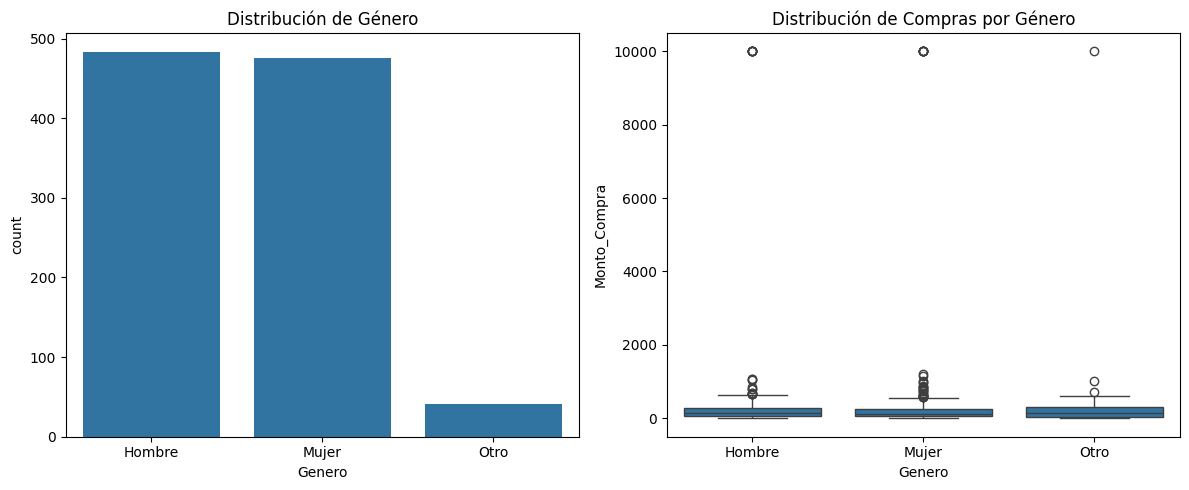

In [ ]:
# Frecuencias absolutas y relativas
print("Distribución de género:")
frecuencia = df['Genero'].value_counts()
relativa = df['Genero'].value_counts(normalize=True) * 100
display(pd.DataFrame({'Frecuencia': frecuencia, '% Relativo': relativa}))

# Tabla de contingencia
print("\nRelación Género vs Satisfacción:")
ct = pd.crosstab(df['Genero'], df['Puntuacion_Satisfaccion'], margins=True)
display(ct)

# Visualización
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Genero', data=df)
plt.title('Distribución de Género')

plt.subplot(1, 2, 2)
sns.boxplot(x='Genero', y='Monto_Compra', data=df)
plt.title('Distribución de Compras por Género')
plt.tight_layout()
plt.show()

**Análisis:**  
- Identificamos proporciones de categorías
- Cruzamos variables categóricas y numéricas
- Usamos gráficos de barras y boxplots

---

**Paso 5: Estadística Descriptiva Numérica**

In [ ]:
# Medidas de posición
print("Media de Edad:", df['Edad'].mean())
print("Mediana de Ingresos:", df['Ingreso_Anual'].median())
print("Moda de Satisfacción:", df['Puntuacion_Satisfaccion'].mode()[0])

# Medidas de dispersión
print("\nRango de Compras:", df['Monto_Compra'].max() - df['Monto_Compra'].min())
print("Varianza de Edad:", df['Edad'].var())
print("Desviación Estándar de Ingresos:", df['Ingreso_Anual'].std())
print("IQR de Compras:", df['Monto_Compra'].quantile(0.75) - df['Monto_Compra'].quantile(0.25))

# Forma de distribución
print("\nAsimetría de Ingresos:", df['Ingreso_Anual'].skew())
print("Curtosis de Edad:", df['Edad'].kurtosis())

Media de Edad: 34.586
Mediana de Ingresos: 37308.5
Moda de Satisfacción: 6

Rango de Compras: 9999
Varianza de Edad: 24.176780780780792
Desviación Estándar de Ingresos: 16715.793811483
IQR de Compras: 219.0

Asimetría de Ingresos: 1.2138529170287387
Curtosis de Edad: 0.08501479850235194



**Interpretación:**  
- Media vs mediana para detectar sesgos
- IQR vs rango para entender dispersión
- Skewness/Kurtosis para forma de distribución

---

**Paso 6: Visualización de Datos Numéricos**

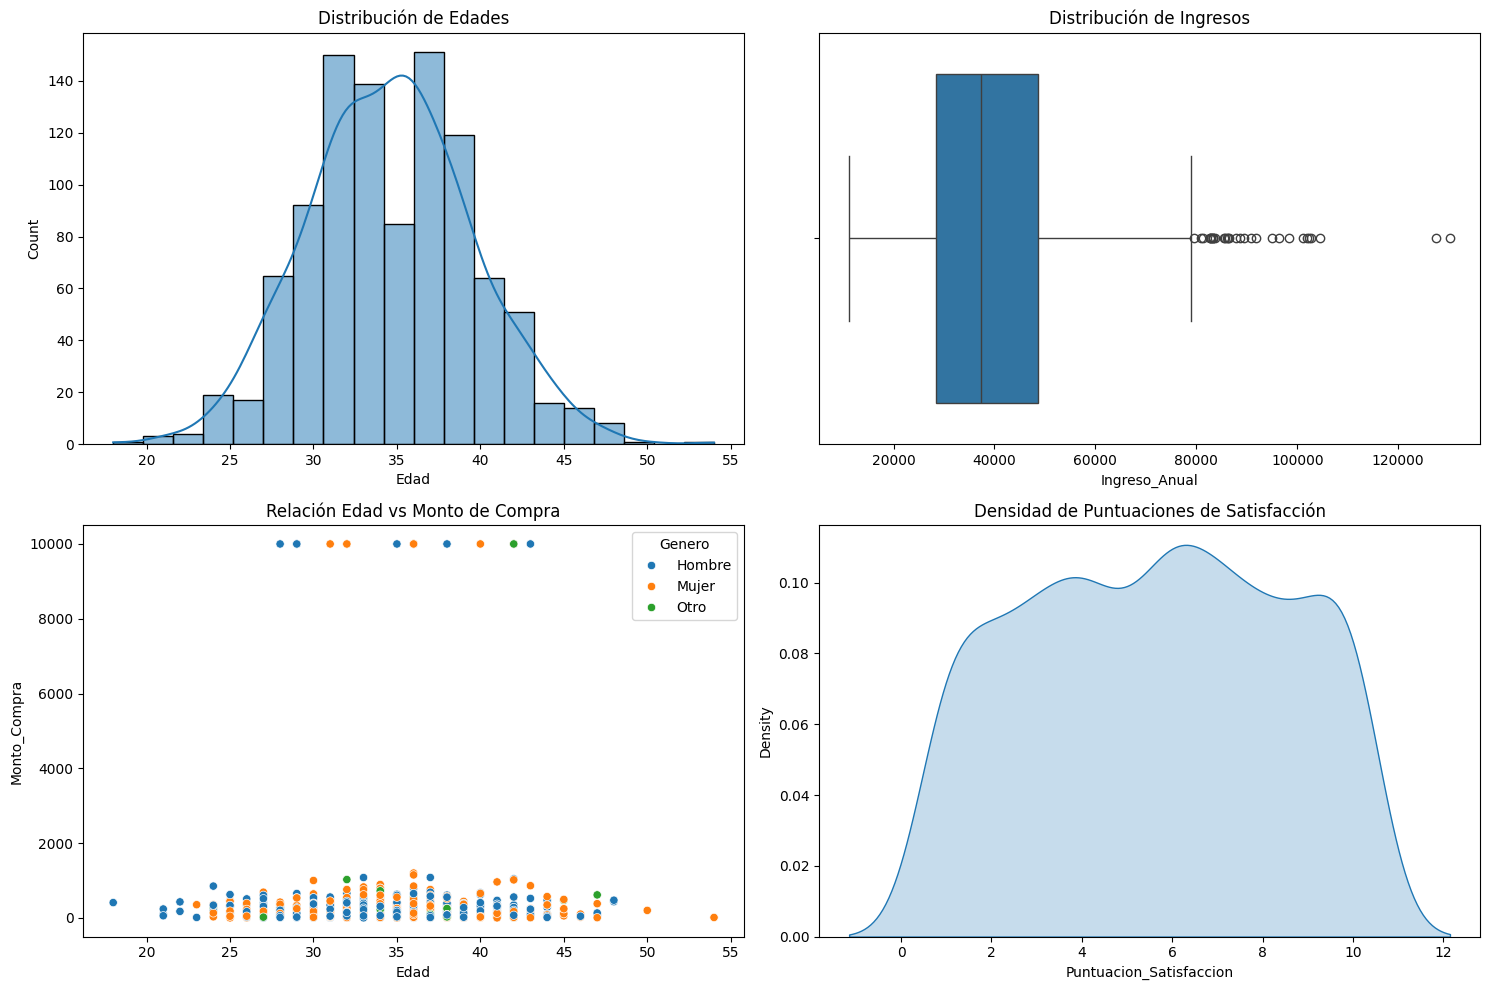

In [ ]:
plt.figure(figsize=(15, 10))

# Histogramas
plt.subplot(2, 2, 1)
sns.histplot(df['Edad'], bins=20, kde=True)
plt.title('Distribución de Edades')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Ingreso_Anual'])
plt.title('Distribución de Ingresos')

# Scatter plot
plt.subplot(2, 2, 3)
sns.scatterplot(x='Edad', y='Monto_Compra', hue='Genero', data=df)
plt.title('Relación Edad vs Monto de Compra')

# Gráfico de densidad
plt.subplot(2, 2, 4)
sns.kdeplot(df['Puntuacion_Satisfaccion'], fill=True)
plt.title('Densidad de Puntuaciones de Satisfacción')
plt.tight_layout()
plt.show()

**Análisis Visual:**  
- Histogramas muestran distribución
- Boxplots identifican outliers
- Scatter plots revelan relaciones
- Gráficos de densidad comparan distribuciones

---

**Paso 7: Manejo de Valores Atípicos**

In [ ]:
# Identificar outliers en compras
Q1 = df['Monto_Compra'].quantile(0.25)
Q3 = df['Monto_Compra'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

print(f"Límite superior para outliers: {limite_superior}")
outliers = df[df['Monto_Compra'] > limite_superior]
print("\nRegistros atípicos:")
display(outliers)

# Opción: Eliminar outliers
df_clean = df[df['Monto_Compra'] <= limite_superior]

Límite superior para outliers: 602.5

Registros atípicos:


,Edad,Ingreso_Anual,Genero,Puntuacion_Satisfaccion,Monto_Compra
6,42,51952,Hombre,3,1043
16,29,27985,Hombre,8,9999
21,33,28869,Mujer,2,827
42,34,55909,Mujer,7,893
44,27,33893,Mujer,4,687
46,32,47142,Hombre,8,660
63,29,18108,Hombre,3,652
78,35,66191,Hombre,5,630
88,32,32741,Otro,10,1025
211,40,27525,Hombre,1,671



**Explicación:**  
- Usamos método IQR para detección
- Mostramos registros sospechosos
- Opción de limpieza del dataset

---

**Conclusión y Próximos Pasos:**  
Hemos realizado un análisis exploratorio completo:
1. Carga y comprensión de datos
2. Limpieza básica de datos
3. Análisis estadístico descriptivo
4. Visualización efectiva

**Ejercicio Adicional:**  
1. Investiga la relación entre Ingreso_Anual y Puntuacion_Satisfaccion
2. Crea una nueva variable categórica para rangos de edad
3. Compara distribuciones entre géneros usando pruebas estadísticas

```python
# Espacio para tu código adicional
# (Puedes escribir aquí tus propias exploraciones)
```

**Recuerda:**  
- Siempre verifica la calidad de datos
- Elige visualizaciones apropiadas para tu audiencia
- Documenta tus hallazgos y decisiones de limpieza

¡Feliz análisis! 🐍📊